In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load Dataset
df = pd.read_csv("googleplaystore.csv")

In [3]:
# Test
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# General information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# DATA WRANGLING AND CLEANING WITH FEATURE ENGINEERING AS WELL

In [5]:
# Find Missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### 1. Find missing values in Rating column, clean it and then make it numerical. 

In [6]:
# Find Missing values in Rating Column and seems like Rating has the most missing values
# df[df["Rating"].isnull()]
df.loc[df["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [7]:
# Statistical Operation on rating column
df["Rating"].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [8]:
# Total values in the Rating Column
df["Rating"].value_counts()

Rating
4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: count, dtype: int64

In [9]:
# Fill missing values with average of the Rating Column
df["Rating"].fillna(df["Rating"].mean(), inplace=True)

In [10]:
# Test
df.loc[df["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
# Since the overall rating can never be more than 5 so 19 is considered as an outlier
df.loc[df["Rating"] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


<Axes: >

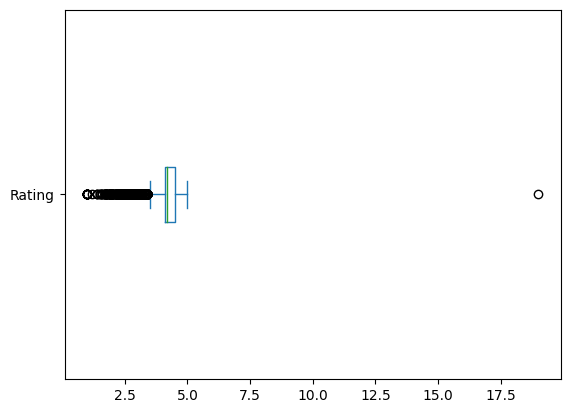

In [12]:
# Since the overall rating can never be more than 5 so 19 is considered as an outlier
df["Rating"].plot(kind="box", vert=False)

In [13]:
# Convert 19 as Nan (missing) value
df.loc[df["Rating"] > 5] = np.nan

In [14]:
# Fill missing value with average
df["Rating"].fillna(df["Rating"].mean(), inplace=True)

In [15]:
# Test
df["Rating"].isnull().sum()

0

In [16]:
# Find missing values
df.isnull().sum()

App               1
Category          1
Rating            0
Reviews           1
Size              1
Installs          1
Type              2
Price             1
Content Rating    1
Genres            1
Last Updated      1
Current Ver       9
Android Ver       3
dtype: int64

In [17]:
# Since the other missnig values are minor and in small amount we can normally drop it
df.dropna(inplace=True)

In [18]:
# Test (no missing value left)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [19]:
# Round the float number to 2
df["Rating"] = df["Rating"].round(2)

### 2. Clean Reviews column and make it numeric. 

In [20]:
# Make Review column as numeric
df["Reviews"] = pd.to_numeric(df["Reviews"])

### How many duplicated Apps are there? 

In [21]:
# Find duplicated values in App column and sort according to reviews
df.loc[df.duplicated(subset="App")].sort_values(by="Reviews",ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1704,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up


In [22]:
# Make a copy of dataset before using it further to save data
df_copy = df.copy()

In [23]:
df.loc[df.duplicated(subset="App")].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


### 3. Remove duplicated values and keep the App with greatest reviews? 

In [24]:
# Remove duplicated values in App column and sort according to reviews
df.drop_duplicates(subset="App", keep="first", inplace=True)

In [25]:
# Test
df.sort_values(by="Reviews", ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76M,"1,000,000,000+",Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
1660,Clash Royale,GAME,4.6,23133508,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up


In [26]:
# No missing value left
df.duplicated(subset="App").sum()

0

### 4. Format the Category column.

In [27]:
# Total values in the Category column
df["Category"].value_counts()

Category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [28]:
# Datatype of Category column
df["Category"].dtype

dtype('O')

In [29]:
# Remove underscore(_) and replaced it with spaces and capitalized the categories
df["Category"] = df["Category"].str.replace("_", " ").str.capitalize()

In [30]:
# Test
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art and design,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art and design,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 4. Clean and convert the Installs column into numeric. 

In [31]:
# Remove coma(,) and plus(+)
df["Installs"] = df["Installs"].str.replace(",", "").str.replace("+", "")

In [32]:
# Convert into numeric
df['Installs'] = pd.to_numeric(df["Installs"])

In [33]:
# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.0+ MB


### 5. Clean and convert Size column to numeric representing size in bytes. 

In [34]:
# Convert Varies with device with 0 in order to change it into average of size
df["Size"] = df["Size"].str.replace("Varies with device", "0")

In [35]:
# Test
df[df["Size"] == "Varies with device"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [36]:
# Total values
df["Size"].value_counts()

Size
0       1226
12M      181
11M      181
13M      177
14M      176
        ... 
721k       1
430k       1
429k       1
200k       1
619k       1
Name: count, Length: 457, dtype: int64

In [37]:
# Remove kb and make it numeric
df.loc[df["Size"].str.contains("k"), "Size"] = (pd.to_numeric(
    df.loc[df["Size"].str.contains("k"), "Size"].str.replace("k", ""))*1024).astype(str)

In [38]:
# Remove MB and make it numeric
df.loc[df["Size"].str.contains("M"), "Size"] = (pd.to_numeric(
    df.loc[df["Size"].str.contains("M"), "Size"].str.replace("M", ""))*(1024 * 1024)).astype(str)

In [39]:
# Test
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3466,Metro name iD,Productivity,4.0,27800,0,10000000,Free,0,Everyone,Productivity,"August 10, 2017",Varies with device,Varies with device
3305,Unit Converter,Tools,4.5,85387,5662310.4,1000000,Free,0,Everyone,Tools,"July 3, 2018",2.1.54,4.0 and up
8766,"Dr. Safety - Antivirus, Booster, Cleaner, AppLock",Tools,4.4,372553,22020096.0,10000000,Free,0,Everyone,Tools,"August 6, 2018",3.0.1114,4.1 and up
6099,BF Scale Health Fitness Tool,Health and fitness,2.2,19,10066329.6,1000,Free,0,Everyone,Health & Fitness,"November 29, 2017",2.1,4.3 and up
6103,Sexy Hot Detector Prank,Family,3.9,17067,2831155.2,5000000,Free,0,Everyone,Casual,"February 13, 2018",2.4.4,4.1 and up


### 6. Clean the Current Ver column. 

In [40]:
# Find number of Varies with device occured
df["Current Ver"].str.contains("Varies with device").sum()

1054

In [41]:
# Replace Varies with device with 0
df["Current Ver"] = df["Current Ver"].str.replace("Varies with device", "0")

### 7. Clean Price column and make it numeric. 

In [42]:
# Remove $ and make it numeric
df["Price"] = pd.to_numeric(df["Price"].str.replace("$", ""))

### 8. Clean Android Ver column and replace Varies with device value with 0.

In [43]:
# Count total values
df["Android Ver"].value_counts()

Android Ver
4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1283
Varies with device     989
4.4 and up             818
2.3 and up             615
5.0 and up             512
4.2 and up             371
2.3.3 and up           273
2.2 and up             239
3.0 and up             230
4.3 and up             221
2.1 and up             133
1.6 and up             115
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              22
1.5 and up              19
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [44]:
# Remove and up and W from Android Ver column
df["Android Ver"] = df["Android Ver"].str.replace("and up", "" )
df["Android Ver"] = df["Android Ver"].str.replace("W", "" )

In [45]:
# Test
df["Android Ver"].value_counts()

Android Ver
4.1                   2202
4.0.3                 1395
4.0                   1283
Varies with device     989
4.4                    829
2.3                    615
5.0                    512
4.2                    371
2.3.3                  273
2.2                    239
3.0                    230
4.3                    221
2.1                    133
1.6                    115
6.0                     54
7.0                     42
3.2                     36
2.0                     31
5.1                     22
1.5                     19
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [46]:
# Remove invalid values
condition = df["Android Ver"].str.contains("-")

In [47]:
# Remove invalid values
df = df.loc[~condition]

In [48]:
# Test
df["Android Ver"].value_counts()

Android Ver
4.1                   2202
4.0.3                 1395
4.0                   1283
Varies with device     989
4.4                    829
2.3                    615
5.0                    512
4.2                    371
2.3.3                  273
2.2                    239
3.0                    230
4.3                    221
2.1                    133
1.6                    115
6.0                     54
7.0                     42
3.2                     36
2.0                     31
5.1                     22
1.5                     19
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
1.0                      2
Name: count, dtype: int64

In [49]:
# Replace Varies with device with 0
df["Android Ver"] = df["Android Ver"].str.replace("Varies with device", "0")

# DATA ANALYSIS

### 1. What company has the most reviews? 

In [50]:
# Find company with most reviews
df.sort_values(by="Reviews", ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,Social,4.1,78158306,0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",0,0


### 2. Which is the category with most uploaded apps? 

In [51]:
# Find the category with most uploads
df["Category"].value_counts().head(1)

Category
Family    1828
Name: count, dtype: int64

### 3. Which category contains the most expensive app? 

In [86]:
# Find Category with expensive app
# df.loc[df["Type"] == "Paid", "Price"].max()
df[df["Type"] == "Paid"].sort_values(by="Price", ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275,7654604.8,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1
5356,I Am Rich Premium,Finance,4.1,1867,4928307.2,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0
5373,I AM RICH PRO PLUS,Finance,4.0,36,42991616.0,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1
5369,I am Rich,Finance,4.3,180,3984588.8,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2
5364,I am rich (Most expensive app),Finance,4.1,129,2831155.2,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3


### 4. Which is the most popular finance app? 

In [53]:
df[df["Category"] == "Finance"].sort_values(by="Installs", ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1083,Google Pay,Finance,4.2,347838,0,100000000,Free,0.0,Everyone,Finance,"July 26, 2018",2.70.206190089,0


### 5. What is the name of most expensive game? 

In [54]:
# Most expensive app of the game category
df[(df["Category"] == "Game") & (df["Type"] == "Paid")].sort_values(by="Price", ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4203,The World Ends With You,Game,4.6,4108,13631488.0,10000,Paid,17.99,Everyone 10+,Arcade,"December 14, 2015",1.0.4,4.0


### 6. Which free game has the most reviews? 

In [55]:
# free app of the game category with most reviews
df[(df["Category"] == "Game") & (df["Type"] == "Free")].sort_values(by="Reviews", ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1670,Clash of Clans,Game,4.6,44891723,102760448.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1


### 7. Which teen game has the most reviews? 

In [56]:
# Teen game with most reviews
df[(df["Category"] == "Game") & (df["Content Rating"] == "Teen")].sort_values(by="Reviews", ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3912,Asphalt 8: Airborne,Game,4.5,8389714,96468992.0,100000000,Free,0.0,Teen,Racing,"July 4, 2018",3.7.1a,4.0.3


### 8. How many terabytes were transfered overall with lifestyle app?

In [60]:
# Teen game with most reviews
temp_df = df[df["Category"] == "Lifestyle"].sort_values(by="Installs", ascending=False).head(1)

In [58]:
# Convert Size column to numeric
df["Size"] = pd.to_numeric(df["Size"])

In [121]:
# Peta bytes
ndf = (temp_df["Installs"] * temp_df["Size"]) / (1024 * 1024 * 1024 * 1024 * 1024)
ndf.round(2)

4587    6.33
dtype: float64

4587    6.33
dtype: float64

# DATA VISUALIZATION

### 1. What company has the most reviews? 

<Axes: xlabel='App'>

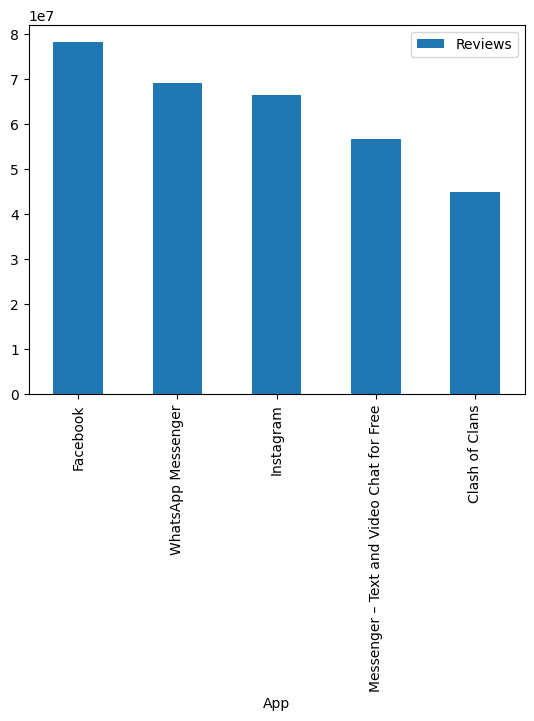

In [69]:
# Find company with most reviews
df.sort_values(by="Reviews", ascending=False).head(5).plot(kind="bar", x="App", y="Reviews")

### 2. Which is the category with most uploaded apps?

Text(0, 0.5, '')

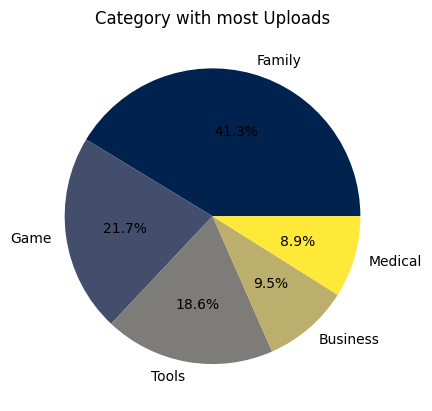

In [79]:
# Find the category with most uploads
df["Category"].value_counts().head(5).plot(kind="pie", autopct="%0.1f%%", cmap="cividis")
plt.title("Category with most Uploads")
plt.ylabel("")

### 3. Which category contains the most expensive app?  

Text(0.5, 0, 'App')

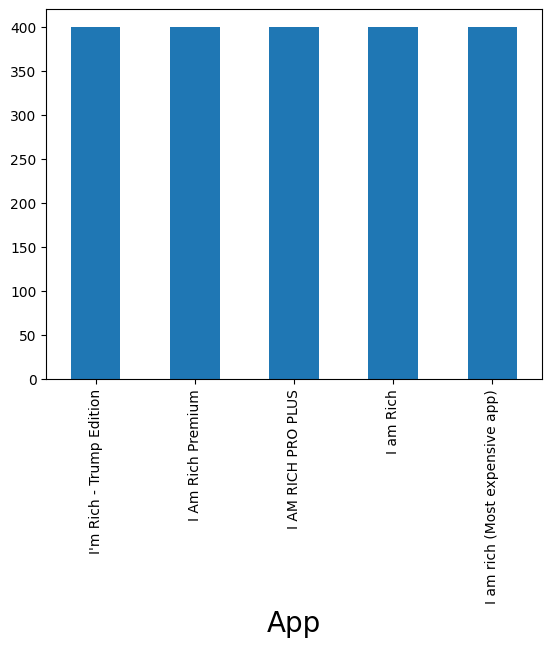

In [98]:
# Find Category with expensive app
# df.loc[df["Type"] == "Paid", "Price"].max()
df[df["Type"] == "Paid"].sort_values(by="Price", ascending=False).head(5).plot(kind="bar", x="App", y="Price", legend=False)
plt.xlabel("App", fontsize=20)

### 4. Which is the most popular finance app?  

Text(0.5, 0, 'App')

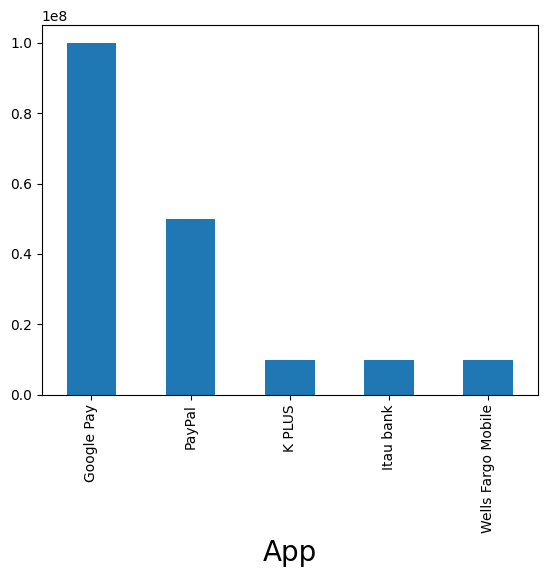

In [97]:
df[df["Category"] == "Finance"].sort_values(by="Installs", ascending=False).head(
    ).plot(kind="bar", x="App", y="Installs", legend=False)
plt.xlabel("App", fontsize=20)

### 5. What is the name of most expensive game?

Text(0.5, 0, 'App')

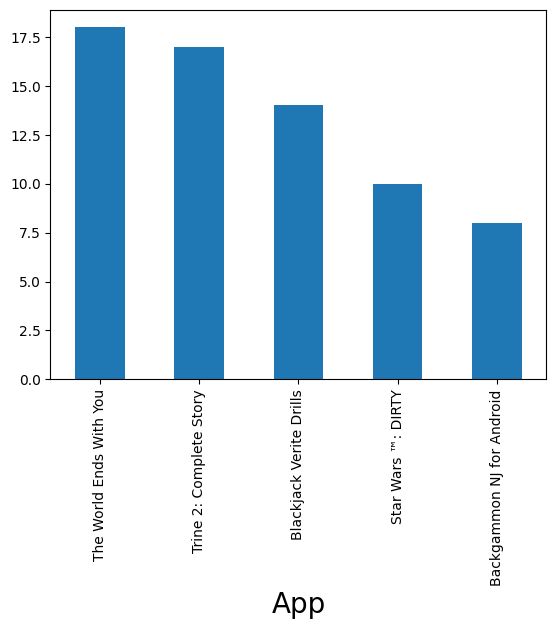

In [103]:
# Most expensive app of the game category
df[(df["Category"] == "Game") & (df["Type"] == "Paid")].sort_values(
    by="Price", ascending=False).head(5).plot(kind="bar", x="App", y="Price", legend=False)
plt.xlabel("App", fontsize=20)

### 6. Which free game has the most reviews? 

Text(0.5, 0, 'App')

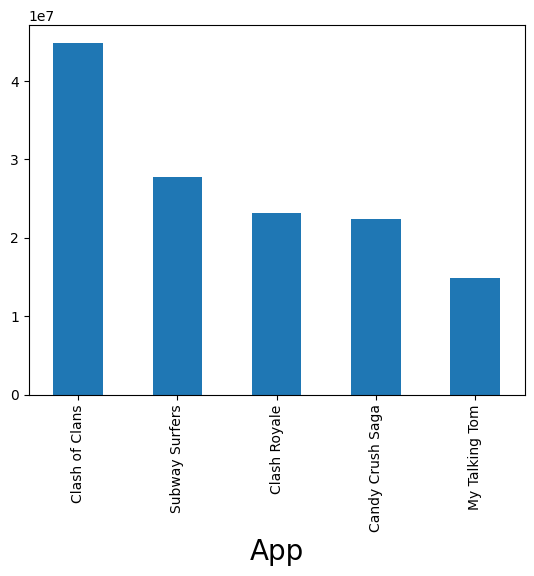

In [108]:
# free app of the game category with most reviews
df[(df["Category"] == "Game") & (df["Type"] == "Free")].sort_values(
    by="Reviews", ascending=False).head().plot(kind="bar", x="App", y="Reviews", legend=False)
plt.xlabel("App", fontsize=20)

### 7. Which teen game has the most reviews?

Text(0.5, 0, 'App')

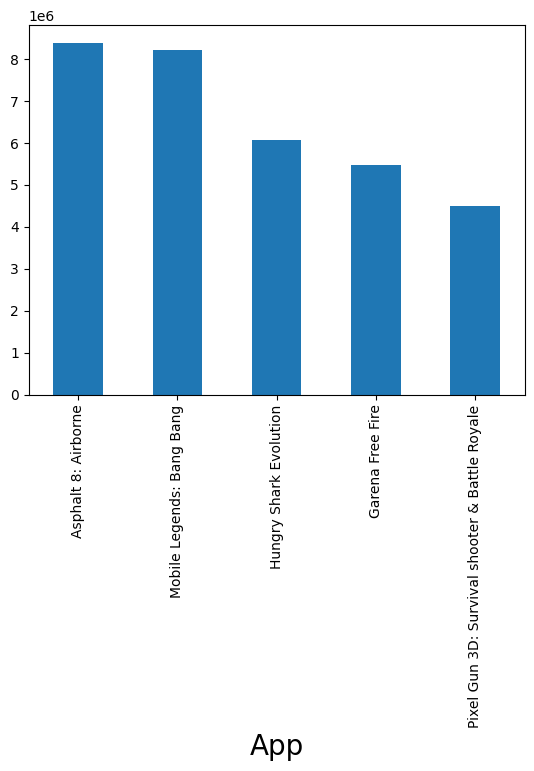

In [112]:
# Teen game with most reviews
df[(df["Category"] == "Game") & (df["Content Rating"] == "Teen")].sort_values(
    by="Reviews", ascending=False).head().plot(kind="bar", x="App", y="Reviews", legend=False)
plt.xlabel("App", fontsize=20)